In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm

from results import load_results, general_stats, pretty_highest_ind
import plot

In [2]:
alpha = 0.1
findq_params = [(0.05, 1.00, 0), (0.10, 1.00, 0), (0.05, 1.00, 1)]

In [7]:
dc2_run_ids = ['dc2_20210930', 'dc2_20211004', 'dc2_20211006']
dc2_find2, dc2_findq = load_results(dc2_run_ids)

ai_run_ids = ['ailerons_20211001']
ai_find2, ai_findq = load_results(ai_run_ids)

mo_run_ids = ['mortgage_20211001']
mo_find2, mo_findq = load_results(mo_run_ids)

datasets = {
    'DC2': (dc2_find2, dc2_findq),
    'Ailerons': (ai_find2, ai_findq),
    'Mortgage': (mo_find2, mo_findq)
}

In [12]:
plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (4.8, 2),
    'text.usetex': True,
    'font.size': 10,
    'axes.titlesize': 7,
    'ytick.labelsize': 4,
    'xtick.labelsize': 4,
    'axes.labelsize': 5,
    'legend.fontsize': 6,
    'legend.borderpad': 0,
    'lines.markersize': 2,
    'lines.linewidth': 0.5,
    'errorbar.capsize': 4,
    'ytick.major.pad': 4,
    'xtick.major.pad': 4,
    'axes.labelpad': 2,
})

style_cycler = plot.StyleCycler(['o', 's', 'D', '*'], ['--'],  plt.rcParams['axes.prop_cycle'])

/tmp/ipykernel_27739/744292410.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "padding_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('/home/aalvarez/Downloads/all.eps', bbox_inches='tight', padding_inches=0)


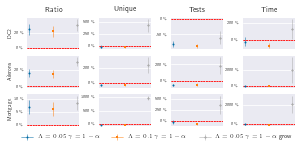

In [15]:
fig, axes = plt.subplots(ncols = 4, nrows = 3, sharex=True)

axes[0, 0].set_title('Ratio')
axes[0, 1].set_title('Unique')
axes[0, 2].set_title('Tests')
axes[0, 3].set_title('Time')

lines = []

for i, (ds, (f2, fq)) in enumerate(datasets.items()):
    axes[i, 0].set_ylabel(ds)
    
    f2mask = (f2['exact'] > 0) & (~f2['timeout']) & (f2['bootstrap_alpha'] == alpha)
    f2 = f2[f2mask]
    
    max_ind_col = next(filter(lambda k: k.startswith('max_'), f2.keys()))
    ratio_f2 = f2[max_ind_col] / f2['exact']
        
    for (j, k), (marker, _, color) in zip(enumerate(findq_params, start=1), style_cycler):
        v = fq[k]
        mask = (v['bootstrap_alpha'] == alpha) & (v['exact'] > 0) & (~v['timeout'])
        v = v[mask]
        label = plot.readable_key(*k)
        l = plot.plot_confidence(axes[i, 0], j, v[max_ind_col] / v['exact'], ref=ratio_f2, label=label, marker=marker, color=color)
        if i == 0:
            lines.append(l)
        plot.plot_confidence(axes[i, 1], j, v['unique_ind'], ref=f2['unique_ind'], label=label, marker=marker, color=color)
        plot.plot_confidence(axes[i, 2], j, v['tests'], ref=f2['tests'], label=label, marker=marker, color=color)
        plot.plot_confidence(axes[i, 3], j, v['time'], ref=f2['time'], label=label, marker=marker, color=color)

fig.legend(lines, [plot.readable_key(*k) for k in findq_params], bbox_to_anchor=[0.5, 0.01], loc='lower center', ncol=3)
        
fig.subplots_adjust(wspace=0.38)
fig.savefig('/home/aalvarez/Downloads/all.eps', bbox_inches='tight', padding_inches=0)
plt.show()